# Exercise 03 - Autoregressive Integrated Moving Average Models

- The result will be evaluated from a report in Jupiter, which must be found in a public GitHub repository.
- The project must be carried out in the groups assigned in class.
- Use clear and rigorous procedures.
- Due date: 22, 2020, 11:59 pm, through Sicua + (Upload repository link)

# 03.1 - Plot the ACF and PACF of the 4 series in data_arma.csv
### Try to say to which AR or MA process each series belong

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
data_arma = pd.read_csv('data_arma.csv', header = 0, index_col = 0)
data_arma.head()

,ts1,ts2,ts3,ts4
0,0.533570,-0.126804,-0.802837,1.812825
1,1.240130,1.314360,-0.595602,0.042764
2,1.618598,1.405994,0.127180,-1.759427
3,1.140465,3.132621,0.958586,-0.456798
4,0.481561,3.179083,0.164598,-1.254790


In [3]:
data_arma.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ts1     500 non-null    float64
 1   ts2     500 non-null    float64
 2   ts3     500 non-null    float64
 3   ts4     500 non-null    float64
dtypes: float64(4)
memory usage: 19.5 KB


Serie ts1: AR(2)


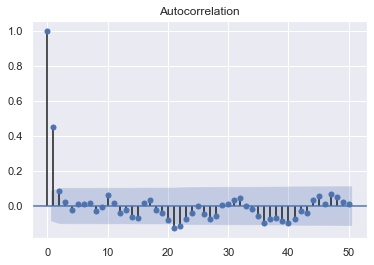

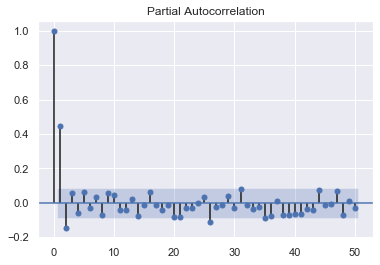

In [4]:
# Autocorrelación
plot_acf(data_arma['ts1'], lags = 50);

# Autocorrelación Parcial
plot_pacf(data_arma['ts1'], lags = 50);

print('Serie ts1: AR(2)')

Serie ts2: AR(1)


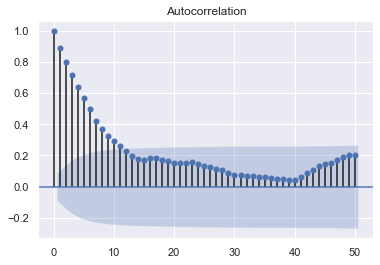

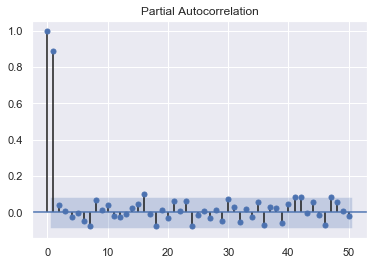

In [5]:
# Autocorrelación
plot_acf(data_arma['ts2'], lags = 50);

# Autocorrelación Parcial
plot_pacf(data_arma['ts2'], lags = 50);

print('Serie ts2: AR(1)')

Serie ts3: AR(7)


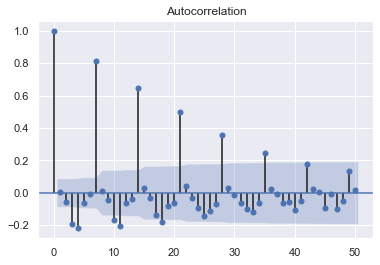

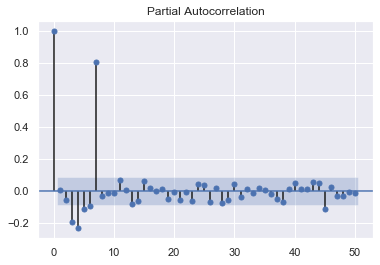

In [6]:
# Autocorrelación
plot_acf(data_arma['ts3'], lags = 50);

# Autocorrelación Parcial
plot_pacf(data_arma['ts3'], lags = 50);

print('Serie ts3: AR(7)')

Serie ts4: ARMA(0,0)


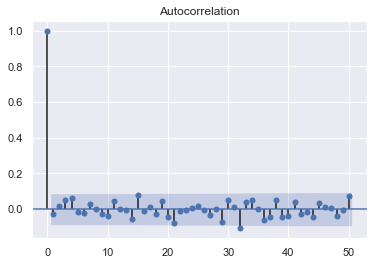

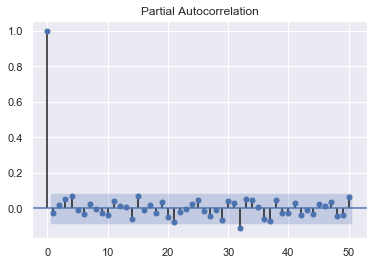

In [7]:
# Autocorrelación
plot_acf(data_arma['ts4'], lags = 50);

# Autocorrelación Parcial
plot_pacf(data_arma['ts4'], lags = 50);

print('Serie ts4: ARMA(0,0)')

# 03.2 - Using the shampoo dataset:
## Find the parameters p, d q that minimizes the mse of the rolling forecast


C:\Users\JCabal\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


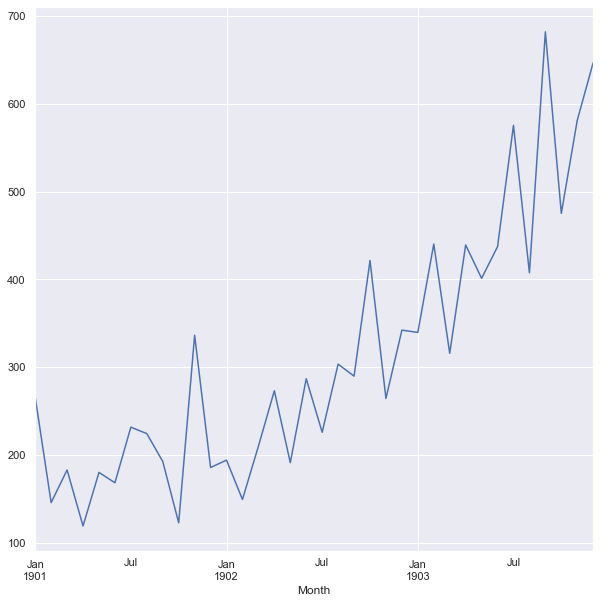

In [8]:
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')
 
series = pd.read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot(figsize=(10, 10));

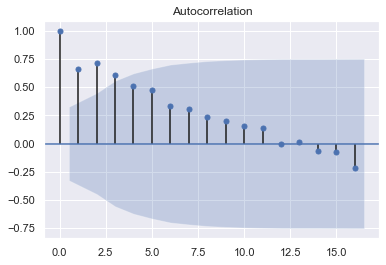

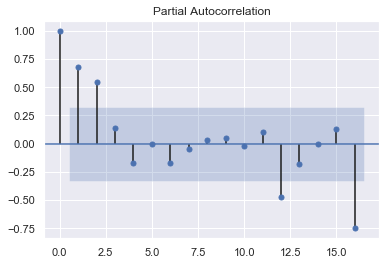

In [9]:
# Autocorrelación
plot_acf(series);

# Autocorrelación parcial
plot_pacf(series);

In [10]:
error = list()

for q in range(0, 5):
    
    X = series.values
    size = int(len(X) * 0.66)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = list()
    yhat = list()
    
    for t in range(len(test)):
        model = ARIMA(history, order = (q,1,0))
        model_fit = model.fit(disp = 0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)

    obs = q
    error = mean_squared_error(test, predictions) ** 0.5
    print('q: %f, Test MSE: %.3f' % (obs, error))   

q: 0.000000, Test MSE: 134.176
q: 1.000000, Test MSE: 84.388
q: 2.000000, Test MSE: 75.432
q: 3.000000, Test MSE: 83.660
q: 4.000000, Test MSE: 81.545


In [11]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order = (2,1,0))
    model_fit = model.fit(disp = 0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted = %f, expected = %f' % (yhat, obs))
    
error = mean_squared_error(test, predictions) ** 0.5
print('Test MSE: %.3f' % error)

predicted = 384.283240, expected = 342.300000
predicted = 316.888888, expected = 339.700000
predicted = 337.349540, expected = 440.400000
predicted = 378.283318, expected = 315.900000
predicted = 413.321038, expected = 439.300000
predicted = 370.978181, expected = 401.300000
predicted = 425.757106, expected = 437.400000
predicted = 429.401365, expected = 575.500000
predicted = 474.580654, expected = 407.600000
predicted = 542.710044, expected = 682.000000
predicted = 480.813952, expected = 475.300000
predicted = 634.327308, expected = 581.300000
predicted = 561.051489, expected = 646.900000
Test MSE: 75.432


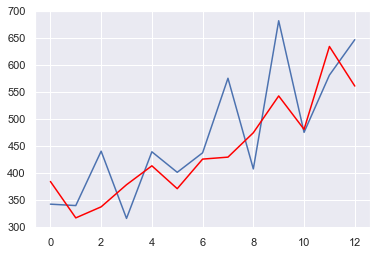

In [12]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Teniendo en cuenta el error cuadratico medio, el mejor modelo ARIMA que se ajusta a los datos es uno ARIMA(2,1,0). Es decir, p = 2, d = 1 y q = 0.